In [18]:
pip list

Package              VersionNote: you may need to restart the kernel to use updated packages.

-------------------- --------
asttokens            2.0.8
attrs                22.1.0
backcall             0.2.0
blpapi               3.18.3
bokeh                2.4.3
colorama             0.4.5
contourpy            1.0.5
cycler               0.11.0
debugpy              1.6.3
decorator            5.1.1
entrypoints          0.4
et-xmlfile           1.1.0
executing            1.0.0
fastjsonschema       2.16.2
fonttools            4.37.2
importlib-resources  5.9.0
iniconfig            1.1.1
ipykernel            6.15.3
ipython              8.5.0
jedi                 0.18.1
Jinja2               3.1.2
jsonschema           4.16.0
jupyter_client       7.3.5
jupyter-core         4.11.1
kiwisolver           1.4.4
MarkupSafe           2.1.1
matplotlib           3.6.0
matplotlib-inline    0.1.6
nbformat             5.6.0
nest-asyncio         1.5.5
numpy                1.23.3
openpyxl             3.0.10
pa

In [19]:
import datetime as dt

today_dt = dt.date(2022, 8, 6)

last_EOW_dt = today_dt
while last_EOW_dt.weekday() != 4:
    last_EOW_dt = last_EOW_dt - dt.timedelta(days=1)

last_EOM_dt = today_dt.replace(day=1) - dt.timedelta(days=1)

last_EOY_dt = dt.date(today_dt.year-1, 12, 31) 

print(f"Today: {today_dt} /  weekday: {today_dt.weekday()}")
print(f"EOLW:  {last_EOW_dt}")
print(f"EOLM:  {last_EOM_dt}")
print(f"EOLY:  {last_EOY_dt}")

Today: 2022-08-06 /  weekday: 5
EOLW:  2022-08-05
EOLM:  2022-07-31
EOLY:  2021-12-31


In [20]:
import datetime as dt

def format_date(dt):
    dt_suffix = ''
    dic = { '01':'st','21':'st','31':'st', 
            '02':'nd','22':'nd', 
            '03':'rd','23':'rd'
            }
    
    try: 
        dt_suffix = dic[dt.strftime("%d")]
    except KeyError:
        dt_suffix = 'th'
        

    dt_formatted = dt.strftime("%b %#d")
    dt_formatted = dt_formatted 
    
    str_dt_formatted = str(dt_formatted) + dt_suffix + ", " + str(dt.strftime("%Y"))


    return str_dt_formatted


today_dt = dt.date(2022, 7, 5)
x = format_date(today_dt)
print(x)

Jul 5th, 2022


In [21]:
import datetime as dt
today_dt = dt.date(2022, 1, 1)


if today_dt.month == 1 or today_dt.month == 2 or today_dt.month == 3:
    last_EOQ_dt = dt.date(today_dt.year-1, 12, 31)
elif today_dt.month == 4 or today_dt.month == 5 or today_dt.month == 6:
    last_EOQ_dt = dt.date(today_dt.year, 3, 31)
elif today_dt.month == 7 or today_dt.month == 8 or today_dt.month == 9:
    last_EOQ_dt = dt.date(today_dt.year, 6, 30)
else:
    last_EOQ_dt = dt.date(today_dt.year, 9, 30)
    
print(last_EOQ_dt)

2021-12-31


In [22]:
import pandas as pd
import datetime as dt

class CLS_Mkt_data():

    def __init__(self):
        self.pd_rates_data = pd.DataFrame()

    
    def import_us_rates_data(self):

        self.pd_us_rates_data = pd.read_excel ('../data/query_bbg.xlsx', sheet_name='query_rates', header=0)
        #self.pd_us_rates_data = self.pd_us_rates_data.set_index('Dates')
    
        
    def get_mkt_data(self, ticker_query, date_query):

        date_query_str = date_query.strftime("%Y-%m-%d")
        df_data_col = self.pd_us_rates_data[['Dates', ticker_query]]
        df_result = df_data_col[df_data_col['Dates'] == date_query_str]

        if df_result.empty:
            while df_result.empty:
                date_query = date_query - dt.timedelta(days=1)
                date_query_str = date_query.strftime("%Y-%m-%d")
                df_result = df_data_col[df_data_col['Dates'] == date_query_str]

        return round(df_result.iloc[0,1],2)
        
        
    
    def get_mkt_data_period(self, ticker_query, date_init_query, date_end_query):
    
        date_init_query_str = date_init_query.strftime("%Y-%m-%d")
        date_end_query_str = date_end_query.strftime("%Y-%m-%d")
        
        df_data_col = self.pd_us_rates_data[['Dates', ticker_query]]
        df_result = df_data_col[df_data_col['Dates'] >= date_init_query_str]
        df_result = df_data_col[df_data_col['Dates'] <= date_end_query_str]

        if df_result.empty:
            while df_result.empty:
                date_query = date_query - dt.timedelta(days=1)
                date_query_str = date_query.strftime("%Y-%m-%d")
                df_result = df_data_col[df_data_col['Dates'] == date_query_str]

        return df_result

cls_mkt_data = CLS_Mkt_data()
cls_mkt_data.import_us_rates_data()

date_query = dt.date(2022, 1, 4)

ticker_query = "USSRVL1 Curncy"
rate_found = cls_mkt_data.get_mkt_data(ticker_query,date_query)
print(rate_found)

13.06


<AxesSubplot: >

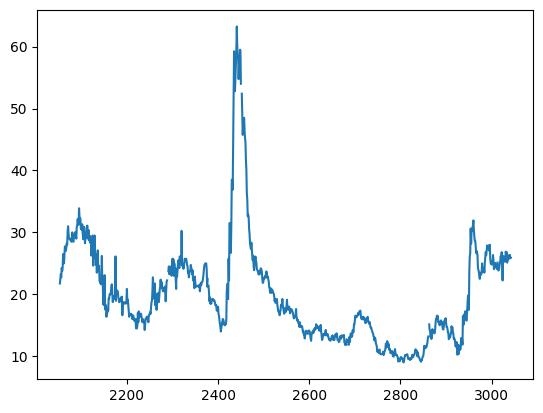

In [23]:
import matplotlib.pyplot as plt

date_query_init = dt.date(2022, 1, 1)
date_query_end = dt.date(2022, 7, 7)

df_historic = cls_mkt_data.get_mkt_data_period(ticker_query,date_query_init,date_query_end)
df_historic["USSRVL1 Curncy"].plot()

In [24]:
#df_historic
df_teste = df_historic.copy()
df_teste.dropna(inplace=True)
df_teste = df_teste.set_index('Dates')

In [25]:
df_teste

,USSRVL1 Curncy
Dates,
2018-10-09,21.7500
2018-10-10,22.5000
2018-10-11,23.2500
2018-10-12,22.7500
2018-10-15,24.2500
...,...
2022-06-30,25.6450
2022-07-01,26.2500
2022-07-05,26.3070


In [26]:
#bokeh test

from bokeh.plotting import figure, output_file, show, output_notebook

graph = figure(x_axis_type = "datetime", title = "Stock Closing Prices")
graph.xaxis.axis_label = 'Date'
graph.yaxis.axis_label = 'Rate'

color = "lightblue"
legend_label = 'Basis'
graph.line(df_teste.index,df_teste['USSRVL1 Curncy'], color = color, legend_label = legend_label)

output_notebook()

show(graph)

from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html

plot = figure()
plot.circle([1,2], [3,4])

html = file_html(graph, CDN, "my plot")

Loading BokehJS ...

In [27]:
import plotly
import plotly.graph_objects as go
from plotly.graph_objects import Layout

layout = Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure([go.Scatter(x=df_teste.index, y=df_teste[ticker_query])], layout=layout)
fig.update_xaxes(showgrid = True, gridwidth = 1, gridcolor='#F3F0EF')
fig.update_yaxes(gridwidth = 1, gridcolor='#F3F0EF')

fig.show()

In [28]:
html_code = plotly.io.to_html(fig)

In [29]:
import pandas as pd
import datetime as dt
df_data = pd.read_excel ('../data/query_bbg.xlsx', sheet_name='query_rates', header=0)

ticker_query = "USSRVL1 Curncy"

#date_query = "2022-1-3"
date = dt.date(2021, 12, 31)
date_query = date.strftime("%Y-%m-%d")
#print(date_query)


df_data_col = df_data[['Dates', ticker_query]]
df_result = df_data_col[df_data_col['Dates'] == date_query]
#df_result = df_result.set_index('Dates')
#print(df_result)

if df_result.empty:
    while df_result.empty:
        date = date - dt.timedelta(days=1)
        date_query = date.strftime("%Y-%m-%d")
        df_result = df_data_col[df_data_col['Dates'] == date_query]


df_result = df_result.set_index('Dates')
print(type(df_result))
print(df_result)




#print(result.shape[0])
#result = df_result.iloc[0,:]
#print(result['Dates'])
#print(result[ticker_query])
#df_result.dropna(inplace=True)

#print(type(date_query))
#df_result.dtypes

#print(df_result)
#print(len(df_result))

<class 'pandas.core.frame.DataFrame'>
            USSRVL1 Curncy
Dates                     
2021-12-31           12.95


In [30]:
teste1 = 'string'
teste2 = ['str1', 'str12']

isinstance(teste1, list)


False

,Libor,SOFR
Tenors,,
1,2,1
2,3,2
3,0,0
4,0,0
5,3,2
6,0,0
7,0,0
8,0,0
9,0,0


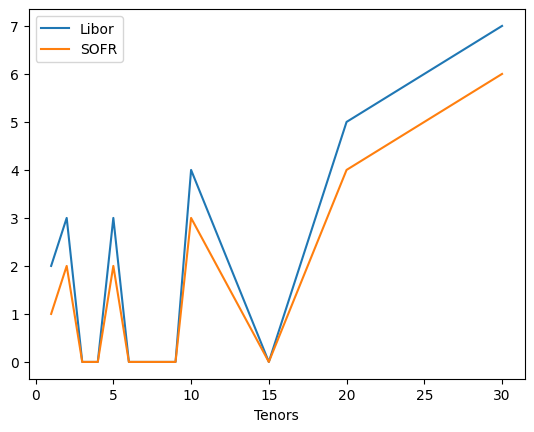

In [31]:
import pandas as pd
import numpy as np
  
#null_value = np.nan
null_value = 0
# initialize data of lists.
data = {'Tenors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30],
        'Libor':  [2, 3 , null_value , null_value , 3, null_value , null_value  , null_value  , null_value ,  4, null_value  ,  5,  7],
        'SOFR':   [1, 2 , null_value , null_value , 2, null_value , null_value  , null_value  , null_value ,  3, null_value  ,  4,  6],
        
        }

# Create DataFrame
df = pd.DataFrame(data)
df = df.set_index('Tenors')
df.plot()
#df.plot(kind = 'scatter', x = 'Tenors')
#df.plot(kind = 'scatter', x = 'Tenors', y='Libor')
#df.plot(kind = 'scatter', x = 'Tenors', y='SOFR')

  
# Print the output.
df

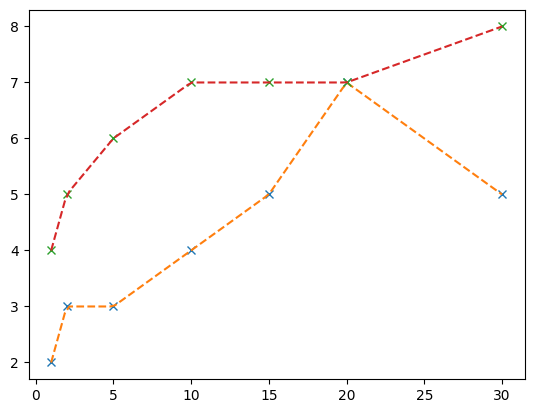

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


data_libor = {'Tenors': [1, 2, 5, 10, 15, 20, 30],
              'Libor':  [2, 3 ,3,  4,  5,  7, 5]
             }

data_sofr = {'Tenors': [1, 2, 5, 10, 15, 20, 30],
              'Sofr':  [4, 5 ,6,  7,  7,  7, 8]
             }

df_libor = pd.DataFrame(data_libor)
f = interp1d(df_libor['Tenors'], df_libor['Libor'])
x_libor_interpolated = np.linspace(df_libor['Tenors'].min(), df_libor['Tenors'].max(), 100)
y_libor_interpolated = f(x_libor_interpolated)

df_sofr = pd.DataFrame(data_sofr)
f = interp1d(df_sofr['Tenors'], df_sofr['Sofr'])
x_sofr_interpolated = np.linspace(df_sofr['Tenors'].min(), df_sofr['Tenors'].max(), 100)
y_sofr_interpolated = f(x_sofr_interpolated)


fig, ax = plt.subplots()
ax.plot(df_libor['Tenors'], df_libor['Libor'], 'x')
ax.plot(x_libor_interpolated, y_libor_interpolated, '--')

ax.plot(df_sofr['Tenors'], df_sofr['Sofr'], 'x')
ax.plot(x_sofr_interpolated, y_sofr_interpolated, '--')